# DP learnings :

DP will apply in questions where there is chance for minimum or maximum of something to be found.<br>
DP questions obviously should have a recursive solution and a RECURRENCE RELATION.<br>

When you have to develop a DP solution, whenever you see yourself making a RECURSIVE CALL TO THE SAME FUNCTION WITH SAME PARAMETER VALUES THINK IF YOU CAN GET THIS VALUE FROM DP ARRAY. Drawing a recursive tree for small inputs can help

## Fibonacci Sequence

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181  
    
    1st : n = 0 : 0
    2nd : n = 1 : 1
    3rd : n = 2 : 1
    4th : n = 3 : 2
    5th : n = 4 : 3
    6th : n = 5 : 5
    7th : n = 6 : 8
    8th : n = 7 : 13
    9th : n = 8 : 21
    10th : n = 9 : 34
    11th : n = 10 : 55
    
    
The definition with Fib(0) = 1 is known as the combinatorial definition, and Fib(0) = 0 is the classical definition. Both are used in the Fibonacci Quarterly, though authors that use the combinatorial definition need to add a sentence of explanation. Benjamin and Quinn in Proofs that Really Count use f_n for the nth combinatorial Fibonacci number and F_n for the nth classical Fibonacci number. The combinatorial definition is good, not surprisingly for counting questions like "How many ways are there to walk up a flight of n steps, taking either one or two steps at a time?" When n is 0, there's one way to do it, not zero ways.

## Fibonacci Recursive solution

In [1]:
def fib(n):
    
    if n==0 or n==1 : 
        return n
    
    ans1 = fib(n-1)
    ans2 = fib(n-2)
    
    myAns = ans1 + ans2
    
    return myAns


n = int(input("Provide a value for n, it will print (n+1)th fibonacci number. Ex n=3 prints 4th fibonacci number \n\n"))
print("{}th fibonacci number is {}".format(n+1, fib(n)))

Provide a value for n, it will print (n+1)th fibonacci number. Ex n=3 prints 4th fibonacci number 

5
6th fibonacci number is 5


### The problem in this solution is that there are too many Recalculations in this recursive solution. These can be avoided by storing the solution of sub-problems already solved and hence avoid recalculations.

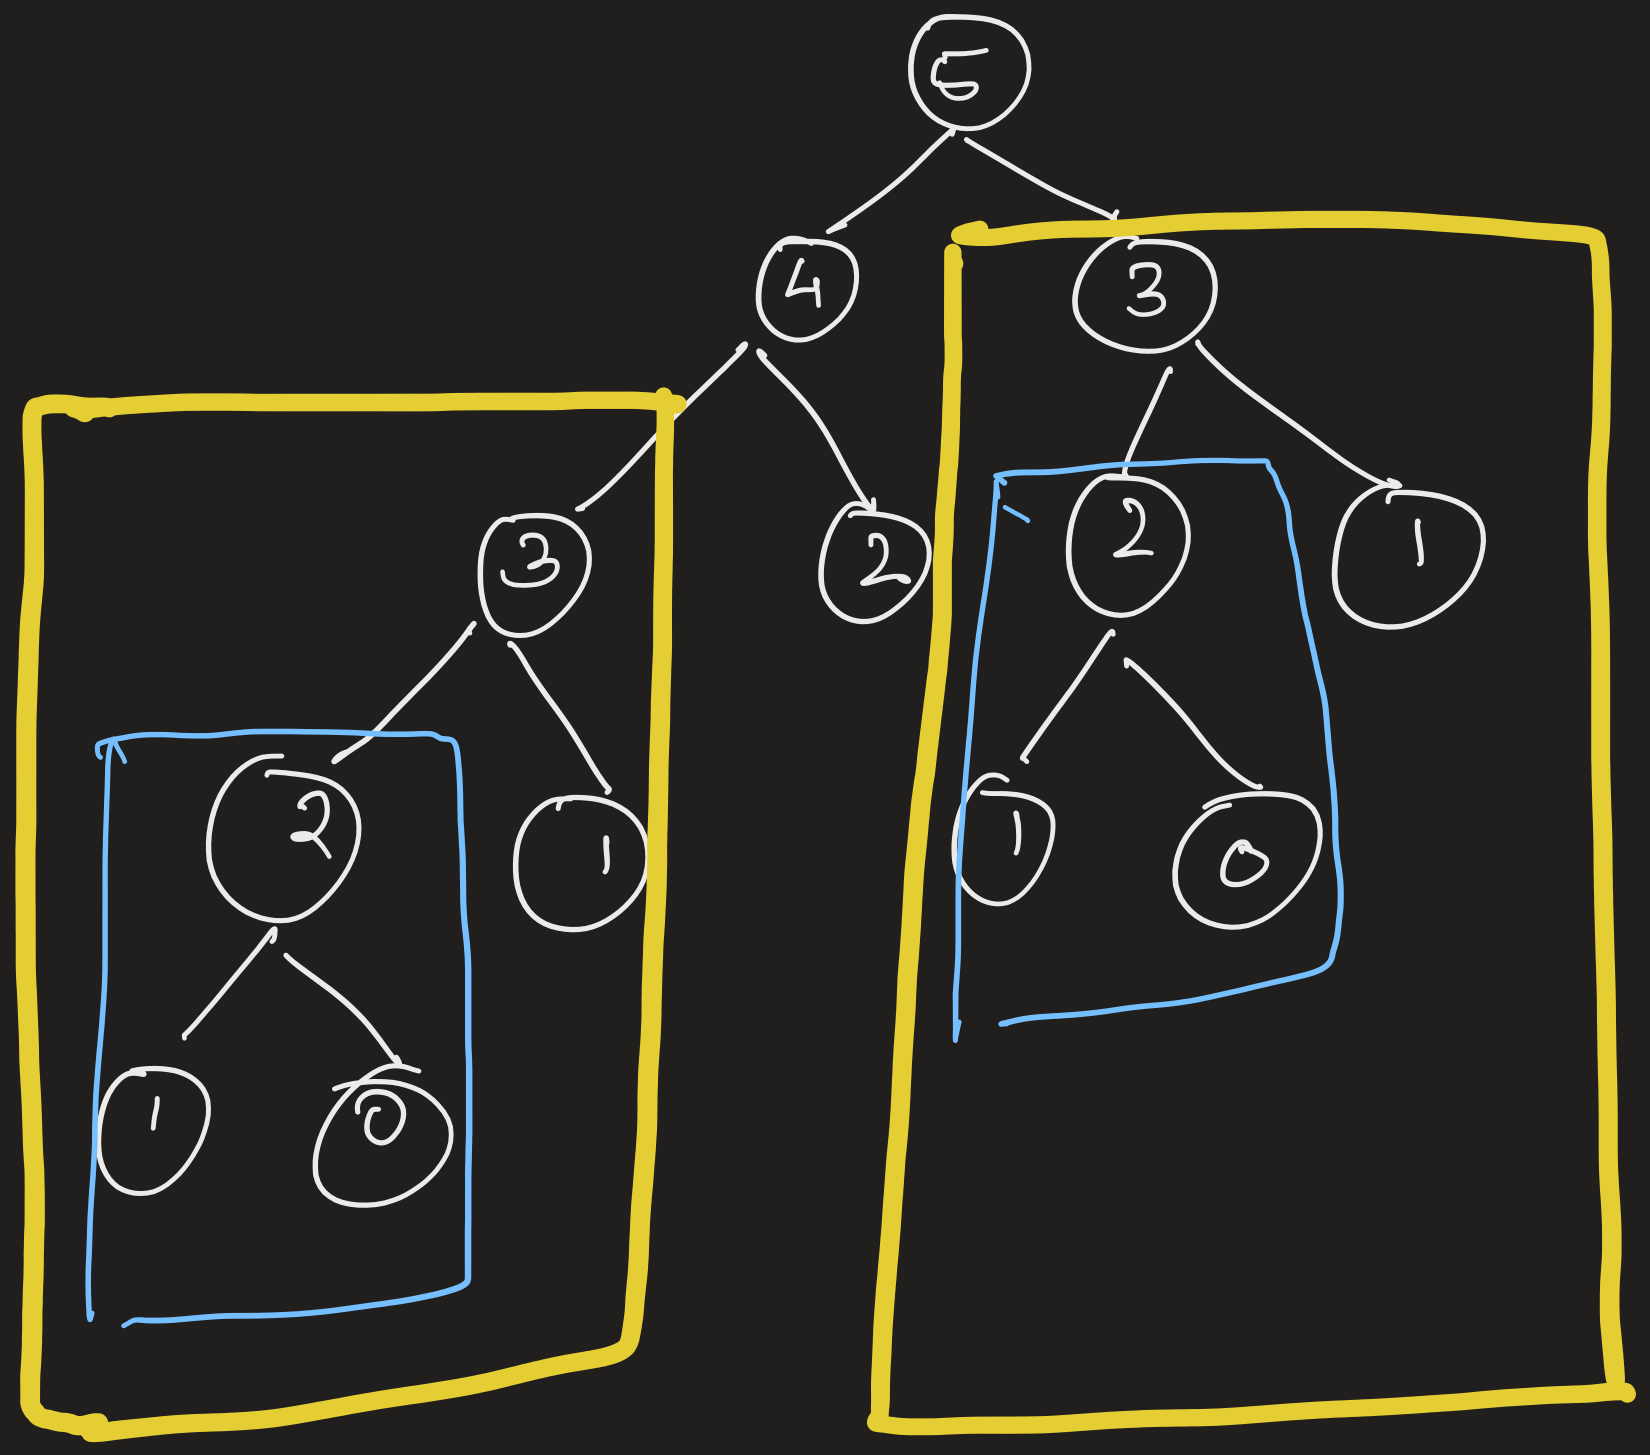

**As you can see above, the node-5 will make a recursive call to node-4 and node-3, but the first call will go to node-4. Node-4 calls for node-3 and node-2. Node-3 will be calculated first. Node-3 calls for node-2 and node-1. Node-2 calls go first. Node-2 calls for node-1 and node-0. Both node-1 and node-0 are base cases and therefore returns 1 and 0 respectively. We sum that up 1+0 = 1 and return the node-2 value as 1. Now, Node-1 call of Node-3 is executed. Node-1 is a base case and hence returns 1. Now node-3 has values from its recursive calls node-2 and node-1 which are 1 and 1 respectively. Node-3 sums it up to 1+1=2 and returns its value=2 to Node-4. Now, Node-2 call of Node-4 is executed. BUT <br>
BUT <br>
We have already calculated node-2 value. If we can store the node-2 value when it was first calculated, we can certainly use it directly instead of making more recursive calls on stack to calculate node-2's value.<br>
This process of saving intermediate calculations is called as MEMOIZATION.**

## Memoization Code of Fibonacci

Wherever you made recursive calls in recursive solution, try to get that value from the dp array and if not available then store it then. Therefore it is critical to come up with recursive solution first.

### Note :- 
### For fib(n) i.e. (n+1)th fibonacci number we will require an array of size (n+1) because we have taken fib(0)=0**

In [2]:
def fib2(n, dp):
    
    if n==0 or n==1:
        return n
    
    # if the value in dp array is -1 ,then its memoized value is not available yet, so call recursion and then save it
    if dp[n-1] == -1:
        ans1 = fib2(n-1, dp)
        dp[n-1] = ans1 # storing the value
    else:
        ans1 = dp[n-1]
        
    if dp[n-2] == -1:
        ans2 = fib2(n-2, dp)
        dp[n-2] = ans2 # storing the value
    else:
        ans2 = fib2(n-2, dp)
        
    myAns = ans1 + ans2
    
    return myAns


n = int(input())

dp = [-1 for _ in range(n+1)] # n+1 because n means n+1th fibonacci number, therefore there are actually n+1 numbers

print("{}th fibonacci number is {}".format(n+1, fib2(n, dp)))


5
6th fibonacci number is 5


## Execution time difference between Non-DP and DP solution

In [8]:
from sys import setrecursionlimit
setrecursionlimit(10 ** 6)
n = 35
dp = [-1 for _ in range(n+1)] 

#### Non-DP solution execution time

In [9]:
%%timeit -n 1
print(fib(n))

9227465
9227465
9227465
9227465
9227465
9227465
9227465
2 s ± 9.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### DP-solution execution time

In [10]:
%%timeit -n 1
print(fib2(n,dp))

9227465
9227465
9227465
9227465
9227465
9227465
9227465
The slowest run took 45.74 times longer than the fastest. This could mean that an intermediate result is being cached.
257 µs ± 513 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Look at the huge time difference between the execution time of each code.

**fib1 with just recursion took 2 seconds and 9 miliseconds on an average to complete the execution.**

**fib2 with dp used, took JUST 257 MICRO-SECONDS. That is 10^4 times faster than fib1 solution. HUGE**

**2seconds = 2\*10^6 = 200*10^4**

# Time Complexity analysis of Non-DP and DP solution for FIBONACCI

### Non-DP Solution
      Time Complexity = O(2^n)
      Space Complexity = O(n)
### DP Solution 
     Time Complexity = O(n)
     Space Complexity = O(2n) = O(n)
**In Non-DP solution, time complexity is O(2^n) as there are 2^n recursive calls. The recursion tree above is a complete binary tree and a CBT has 2^n nodes.  
The space complexity of non-dp solution is O(n).  
<br>
In DP-solution, the time complexity is O(n) i.e. same as left tree height as only those recursive calls are made. We have only 1 recursive call for each number and any repetitive call's value is O(1) as its value is fetched from the DP array.<br>
The space complexity of DP-Solution is O(2n) which is O(n) as O(n) is required for left tree recursive calls and O(n) is required for the DP array for each value from 1 to N .**

# Iterative Dynamic Programming ( no-recursive calls here )

Only after writing recursive solution and recursive-dp, should you try to write iterative solution when learning<br>

**Always start iterative DP by filling value for the BASE CASE of Recursive Solution in DP array and then build the DP array on the go**

## Where to start filling the dp array from ?

**Wherever you base-case is, start filling value in dp array from there. <br>
For example : In fibonacci our base-case is :<br>
if n==0 or n==1: <br>
return n<br>
This means that our base case if from starting of array i.e. i=0, therefore start filling the dp array from there
and keep building on it.<br>
In fact in such case your answer will be at the last element of the array**<br>

**For example : In LIS question in next file, you see our base case is :<br>
if i==n:<br>
return 0,0<br>
Then basically we should start filling the dp array from end and build till first element.<br> Our answer in fact will be at the first element of the dp array**

Iterative DP can only be done if you have identified:  
    
    Recursion in the problem
    Recurrence Relation is found
    Memoization can be done
    
Steps involved in iterative dynamic programming:  

    Step-1 : Initialize a dp[...] array with -1's
    Step-2 : Fill the BASE-CASE VALUES (from recursion) you know in the dp[...] array.
    Step-3 : Apply RECURRENCE RELATION for i-th index value and fill the value in dp[...] array.
    Step-4 : Finally fib(n) = dp[n] ( for fibonacci example, but overall last index will contain your answer ).
    
    
    
    

<h1><span style="color:yellow">IMPORTANT TERMINOLOGIES</span></h1>

### Memoization is called as TOP-DOWN DP : 

Because in memoization, you start from the root of the recursive tree and then move to the sub-problems and finally reach the Leaf of the recursive tree and from there you build the solution. <br>

Memoization involves recursion where we go from TOP to BOTTOM of the Recursive Tree<br>

### Tabulation / Iterative DP is called as BOTTOM-UP DP:

Because in tabulation, we start from base-case which is basically LEAF OF Recursive Tree , this base-case value we enter at the 0th/1st element of the dp-array and from there, iteratively, using recurrence relation, we build rest of the dp-array which basically are lower sub-problems. Finally we reach the last element of the dp-array which is the ROOT OF RECURSIVE TREE. <br>

Since we go from LEAF TO ROOT of the Recursive Tree, we call it BOTTOM-UP approach

<span style="color:yellow">---------------------------------------------------------------</span>

In [12]:
def fibIterativeDP(n):
    
    dp = [-1 for _ in range(n+1)]
    
    # put values of base cases
    dp[0] = 0
    dp[1] = 1
    
    i = 2
    while i<=n:
        dp[i] = dp[i-1] + dp[i-2]
        i = i+1
        
    return dp[n]

In [21]:
%%timeit -n 1
n = 35
print(fibIterativeDP(n))

9227465
9227465
9227465
9227465
9227465
9227465
9227465
The slowest run took 29.22 times longer than the fastest. This could mean that an intermediate result is being cached.
51 µs ± 94 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Time Complexity = O(n)
### Space Complexity = O(n)

## Why iterative DP is better than Recursive DP

**Because in recursion you have overhead of STACKOVERFLOW**

In Java, C++ , you get stackoverflow error if your recursion based stack size is 10^4 or more. In python it is default to 10^3 but can be increased to 10^4 using sys.setrecursionlimit .<br>
If your space complexity is O(n) of the algorithm, then you need to make n recursive calls on stack which means if you calculate fibonacci for n=10^6 i.e. fib(10^6) you will get stackoverflow error.

## Minimum steps to 1 question.

Given a positive integer 'n', find and return the minimum number of steps that 'n' has to take to get reduced to 1. You can perform any one of the following 3 steps:

    1.) Subtract 1 from it. (n = n - 1) ,
    2.) If n is divisible by 2, divide by 2.( if n % 2 == 0, then n = n / 2 ) ,
    3.) If n is divisible by 3, divide by 3. (if n % 3 == 0, then n = n / 3 ).  
    
    
https://classroom.codingninjas.com/app/classroom/me/1371/content/21566/offering/210767/problem/852

### Recursive solution

In [82]:
def minStepsTo1(n):
    
    # if you are already at 1 then no step required
    if n<=1:
        return 0
    
    ans1 = minStepsTo1(n-1)
    
    ans2 = float("inf")
    if n%2 ==0:
        ans2 = minStepsTo1(n/2) # doing // because / gives float, also // and / gives same answer here 
                                #as number is already divisible by 2 as we checked with modulo
    
    ans3 = float("inf")
    if n%3 == 0:
        ans3 = minStepsTo1(n/3)
        
        
    myAns = 1 + min(ans1, ans2, ans3) # recurrence relation
    
    return myAns

In [83]:
%%timeit -n 1
print(minStepsTo1(50))

6
6
6
6
6
6
6
The slowest run took 4.41 times longer than the fastest. This could mean that an intermediate result is being cached.
2.76 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### If you draw a recursive tree of above solution, then you will get a lot of recalculations or repetitive sub-problems , which means you can optimize it using memoization i.e. applying DP
<br>

### DP Solution = Recursive relation with Memoization solution

In [79]:
def minStepsTo1_DP(n, dp):
    
    if n <= 1:
        return 0
    
    if dp[n-1] == -1:
        ans1 = minStepsTo1_DP(n-1, dp)
        dp[n-1] = ans1
    
    ans2 = float("inf")
    if n%2 == 0:
        
        if dp[n//2] == -1:
            ans2 = minStepsTo1_DP(n//2, dp)
            dp[n//2] = ans2
        else:
            ans2 = dp[n//2]
            
    ans3 = float("inf")
    if n%3 == 0:
        if dp[n//3] == -1:
            ans3 = minStepsTo1_DP(n//3, dp)
            dp[n//3] = ans3
        else:
            ans3 = dp[n//3]
            
            
    return 1 + min(ans1, ans2, ans3)

In [81]:
%%timeit -n 1
n = 50
dp = [-1 for _ in range(n+1)]
print(minStepsTo1_DP(n, dp))

6
6
6
6
6
6
6
The slowest run took 4.85 times longer than the fastest. This could mean that an intermediate result is being cached.
281 µs ± 189 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Iterative DP solution

In [84]:
def minStepsTo1_Iterative_DP(n):
    
    # since we are starting with dp[1] = 0, we need to have an array till n or 1 to n which by index is 0 to n
    # therefore it is (n+1) sized array and now we can return dp[n] for minStepsTo1(n)
    dp = [-1 for _ in range(n+1)]
    dp[0] = 0
    dp[1] = 0
    
    i = 2
    while i <= n:
        
        ans1 = dp[i-1]
        ans2 = float("inf")
        if i%2 == 0:
            ans2 = dp[i//2]
        ans3 = float("inf")
        if i%3 == 0 :
            ans3 = dp[i//3]
            
        dp[i] = 1 + min(ans1, ans2, ans3)
        i = i+1
    
    return dp[n]

In [73]:
minStepsTo1_Iterative_DP(5)

3

In [72]:
print(minStepsTo1(5))

3


# Minimum Squares required to represent N

14 = 1^2 + 1^2 + ..... + 1^2 <br>
14 = 2^2 + 2^2 + 1^2 + 1^2 + ..... <br>
14 = 2^2 + 2^2 + 2^2 + 1^2 + 1^2 <br>
14 = 3^2 + 2^2 + 1^2 <br>

As we can see we need minimum 3 squares (3,2,1) to represent N=14

A number can always be represented as a sum of squares of other numbers. Note that 1 is a square and we can always break a number as [(1 * 1) + (1 * 1) + (1 * 1) + …]. Given a number n, find the minimum number of squares that sum to n.

## Recursive Solution

In [93]:
def minSquares(n):
    #Implement Your Code Here
    
    if n ==0 :
        return 0
    
    ans = float("inf")
    i = 1
    while i*i <= n:
        
        current_ans = 1 + minSquares(n - i*i)
        ans = min(ans, current_ans)
        i = i+1
        
    return ans

### Sir solution

In [109]:
import sys, math

In [110]:
def minSquares_sir(n):
    
    if n==0:
        return 0
    
    ans = sys.maxsize
    root = int(math.sqrt(n))
    for i in range(1, root+1):
        currAns = 1 + minSquares_sir(n-(i**2))
        ans = min(ans, currAns)
        
    return ans

n = int(input())
ans = minSquares_sir(n)
print(ans)

41
2


In [99]:
%%timeit -n 1
print(minSquares(50))

2
2
2
2
2
2
2
13.3 s ± 79.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Time Complexity

If you draw the recursion tree, you will see a lot of Complete Binary Tree like recursive calls and hence we can say that the complexity will be exponential.<br>

## DP Solution = Recursion + Memoization

In [118]:
def minSquares_dp(n, dp):
    
    if n == 0:
        return 0  # not required to set dp[0] = 0 as whenever n==0 call would be there we are directly returning 0
    
    if dp[n] != -1:
        return dp[n]
    else:
        
        ans = float("inf")
        i = 1
        while i*i <= n:
            
            current_ans = 1 + minSquares_dp(n - i*i, dp)
            ans = min(ans, current_ans)
            i = i+1
        
        dp[n] = ans
    
    return ans

### Sir solution

In [119]:
def minSquares_dp_sir(n, dp):
    
    if n==0:
        return 0
    
    ans = sys.maxsize
    root = int(math.sqrt(n))
    for i in range(1, root+1):
        
        newCheckValue = n - (i**2)
        if dp[newCheckValue] == -1:
            smallAns = minSquares_dp_sir(newCheckValue, dp)
            dp[newCheckValue] = smallAns
            currAns = 1 + smallAns
        else:
            currAns = 1 + dp[newCheckValue] # even to find from dp array we are doing +1 as when we stored in dp array
                                            # we did not save it as +1
            
        ans = min(ans, currAns)
        
    return ans

n = int(input())
dp = [-1 for _ in range(n+1)]
ans = minSquares_dp_sir(n, dp)
print(ans)

41
2


In [116]:
%%timeit -n 1
n = 50
dp = [-1 for _ in range(n+1)]
print(minSquares_dp(n, dp))

2
2
2
2
2
2
2
452 µs ± 167 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Time Complexity

The numbers of iterations of the while loop is $\sqrt{n}$ as loop runs by condition i\*i <= n and hence we will reach n (from i=1) in squares jump. Now, at n=50 , iterator i=1 and hence the we enter loop as 1\*1 < 50 ( i\*i < n ) and then make the the first recursive call as minSquares(n-i\*i) which is minSquares(50-1\*1) i.e. minSquares(49). Now for n=49 , same logic will be repeated and therefore there will be atleast call for each 50,49,48......1 i.e. for each n. Therefore our time complexity will be **O(n)= n*\$\sqrt{n}$**.

## Iterative DP solution

In [123]:
def minSquaresIteratively(n):
    
    dp = [-1 for _ in range(n+1)]
    dp[0] = 0
    
    i = 1
    while i <= n:
        
        ans = float("inf")
        j = 1
        while j*j <= i:
            
            if dp[i] == -1:
                
                currAns = 1 + dp[i-(j*j)]
                
                ans = min(ans, currAns)
                j = j+1
                
        dp[i] = ans
        i = i+1
    
    return dp[n]
            
        

In [124]:
n = 41
minSquaresIteratively(n)

2

### Sir Solution

In [126]:
def minSquaresI(n):
    
    dp = [-1 for _ in range(n+1)]
    dp[0] = 0
    
    for i in range(1, n+1):
        
        ans = sys.maxsize
        root = int(math.sqrt(i))
        for j in range(1, root+1):
            currAns = 1 + dp[i-(j**2)]
            ans = min(ans, currAns)
        dp[i] = ans
        
    return dp[n]

n = 41
ans = minSquaresI(n)
print(ans)

2


## Time Complexity : 

Just like Recursive DP solution, here there are n unique calls and for each call we run a loop for $\sqrt{n}$ times. Therefore the complexity is **O(n) = n*$\sqrt{n}$**

## Space Complexity:

We took n space for dp array , therefore O(n) space complexity